# Sentiment Analysis of All Products

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

import warnings
warnings.filterwarnings("ignore")

C:\Users\esra.erkan\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [4]:
### Keybord & Mouse
dell_key = pd.read_excel("./veriler/keyboard_mouse/dell_km636_wireless_keyword_mouse.xlsx")
hp_key = pd.read_excel("./veriler/keyboard_mouse/hp_wireless_keyword_mouse.xlsx")
jellycomb_key = pd.read_excel("./veriler/keyboard_mouse/jellycomb_wireless_keyword_mouse.xlsx")
microsoft_key = pd.read_excel("./veriler/keyboard_mouse/microsoft_wireless_keyword_mouse.xlsx")
logitech_key = pd.read_excel("./veriler/keyboard_mouse/logitech_MK335_wireless_keyword_mouse.xlsx")

# all keyboard & mouse data 
frames = [dell_key, microsoft_key, jellycomb_key, logitech_key, hp_key]
df_key = pd.concat(frames)
df_key.rename(columns={"product": "product_name"}, inplace=True)
df_key.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 4
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  205 non-null    object
 1   name          205 non-null    object
 2   date          205 non-null    object
 3   title         205 non-null    object
 4   rating        205 non-null    int64 
 5   text          205 non-null    object
dtypes: int64(1), object(5)
memory usage: 11.2+ KB


In [5]:
df_key["product"] = "Keyboard_Mouse"
df_key.head(100)

,product_name,name,date,title,rating,text,product
0,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,Andy. The Captain,"May 20, 2018",Simply don't buy it... There is no excuse for ...,1,This keyboard shouldn't be sold. I don't know ...,Keyboard_Mouse
1,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,Dan Neuwirth,"May 11, 2018","Feels good, but has its flaws.",2,"I'm really torn over this. On the one hand, i...",Keyboard_Mouse
2,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,Manvendra Singh,"December 26, 2017",Simply amazing and great value for money.,5,I work in IT industry for over ten years so I...,Keyboard_Mouse
3,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,IJK,"March 31, 2019",Skips letters..read update,5,Update:I actually went to the dell website and...,Keyboard_Mouse
4,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,SGoldfarb,"August 15, 2018",Decent keyboard - major drawbacks though.,2,So I got a new job where I would be working wi...,Keyboard_Mouse
...,...,...,...,...,...,...,...
45,Microsoft Wireless Comfort Desktop 5050 (PP4-0...,Melsman,"March 31, 2018",Works well once you solve the jerky mouse/miss...,3,... and the way you solve the jumpy mouse and ...,Keyboard_Mouse
46,Microsoft Wireless Comfort Desktop 5050 (PP4-0...,Amazon Customer,"September 29, 2016",How to Disable the Back buttons on the mouse!,3,The Keyboard- Isgood except that the function ...,Keyboard_Mouse
47,Microsoft Wireless Comfort Desktop 5050 (PP4-0...,Randy,"July 11, 2020",Have bought many and will continue to! Best k...,5,I have bought many of these over the years. B...,Keyboard_Mouse
48,Microsoft Wireless Comfort Desktop 5050 (PP4-0...,Jimmy Lockes,"May 22, 2018",The Keyboard is great but the mouse stopped wo...,1,I just got this a couple weeks ago and it was ...,Keyboard_Mouse


In [6]:
### Smarth Watch
apple6_watch = pd.read_excel("./veriler/smarth_watch/Apple_watch_series6.xlsx")
apple5_watch = pd.read_excel("./veriler/smarth_watch/Apple_watch_series5.xlsx")
huawei_watch = pd.read_excel("./veriler/smarth_watch/huawei_watch.xlsx")
samsung2_watch = pd.read_excel("./veriler/smarth_watch/samsung_galaxy_watch2.xlsx")
samsung3_watch = pd.read_excel("./veriler/smarth_watch/samsung_galaxy_watch3.xlsx")
virme_watch = pd.read_excel("./veriler/smarth_watch/Virmee_VT3_watch.xlsx")

# all smart watch data
frames = [apple6_watch, apple5_watch, huawei_watch, samsung2_watch, samsung3_watch, virme_watch]
df_watch = pd.concat(frames)
df_watch.rename(columns={"product": "product_name"}, inplace=True) # changed the column name
df_watch["product"] = "Smarth_Watch" # added a new column
df_watch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  263 non-null    object
 1   name          263 non-null    object
 2   date          263 non-null    object
 3   title         263 non-null    object
 4   rating        263 non-null    int64 
 5   text          263 non-null    object
 6   product       263 non-null    object
dtypes: int64(1), object(6)
memory usage: 16.4+ KB


In [7]:
### Speaker
anker_speaker = pd.read_excel("./veriler/speaker/anker_speaker.xlsx")
bose_speaker = pd.read_excel("./veriler/speaker/bose_speaker.xlsx")
jpl_speaker = pd.read_excel("./veriler/speaker/jbl_speaker.xlsx")
OontZ_angle3_speaker = pd.read_excel("./veriler/speaker/OontZ_angle3_speaker.xlsx")
sony_speaker = pd.read_excel("./veriler/speaker/sony_speaker.xlsx")

# all speaker data
frames = [anker_speaker, bose_speaker, jpl_speaker, OontZ_angle3_speaker, sony_speaker]
df_speaker = pd.concat(frames)
df_speaker.rename(columns={"product": "product_name"}, inplace=True) # changed the column name
df_speaker["product"] = "Speaker" # added a new column
df_speaker.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  250 non-null    object
 1   name          250 non-null    object
 2   date          250 non-null    object
 3   title         250 non-null    object
 4   rating        250 non-null    int64 
 5   text          250 non-null    object
 6   product       250 non-null    object
dtypes: int64(1), object(6)
memory usage: 15.6+ KB


In [8]:
### Wireless Earbuds
anker_earbuds = pd.read_excel("./veriler/wireless_earbuds/anker_soundcare_wireless_earbuds.xlsx")
powerbeats_earbuds = pd.read_excel("./veriler/wireless_earbuds/powerbeats_pro_wireless_earbuds.xlsx")
samsung_earbuds = pd.read_excel("./veriler/wireless_earbuds/samsung_galaxy_wireless_earbuds.xlsx")
skullcandy_earbuds = pd.read_excel("./veriler/wireless_earbuds/skullcandy_wireless_earbuds.xlsx")
tozo_earbuds = pd.read_excel("./veriler/wireless_earbuds/tozo_wireless_earbuds.xlsx")

# all wireless earbuds data
frames = [anker_earbuds, powerbeats_earbuds, samsung_earbuds, skullcandy_earbuds, tozo_earbuds]
df_earbuds = pd.concat(frames)
df_earbuds.rename(columns={"product": "product_name"}, inplace=True) # changed the column name
df_earbuds["product"] = "Wireless_Earbuds" # added a new column
df_earbuds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  250 non-null    object
 1   name          250 non-null    object
 2   date          250 non-null    object
 3   title         250 non-null    object
 4   rating        250 non-null    int64 
 5   text          250 non-null    object
 6   product       250 non-null    object
dtypes: int64(1), object(6)
memory usage: 15.6+ KB


In [9]:
frames = [df_key, df_watch, df_speaker, df_earbuds]
data = pd.concat(frames)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 968 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  968 non-null    object
 1   name          968 non-null    object
 2   date          968 non-null    object
 3   title         968 non-null    object
 4   rating        968 non-null    int64 
 5   text          968 non-null    object
 6   product       968 non-null    object
dtypes: int64(1), object(6)
memory usage: 60.5+ KB


In [10]:
data.date = pd.to_datetime(data['date']) 

In [13]:
data.head()

,product_name,name,date,title,rating,text,product
0,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,Andy. The Captain,2018-05-20,Simply don't buy it... There is no excuse for ...,1,This keyboard shouldn't be sold. I don't know ...,Keyboard_Mouse
1,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,Dan Neuwirth,2018-05-11,"Feels good, but has its flaws.",2,"I'm really torn over this. On the one hand, i...",Keyboard_Mouse
2,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,Manvendra Singh,2017-12-26,Simply amazing and great value for money.,5,I work in IT industry for over ten years so I...,Keyboard_Mouse
3,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,IJK,2019-03-31,Skips letters..read update,5,Update:I actually went to the dell website and...,Keyboard_Mouse
4,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,SGoldfarb,2018-08-15,Decent keyboard - major drawbacks though.,2,So I got a new job where I would be working wi...,Keyboard_Mouse


In [14]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import nltk

#stemmer = SnowballStemmer('english')
#stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def lemmatize(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize(token))
            #result.append(token)
    return " ".join(result)

In [15]:
processed_docs = data['text'].map(preprocess)
processed_docs[:5]

0    keyboard shouldn sell know dell manage post am...
1    tear hand feel nicely design key feel great co...
2    work industry years keyboards mouse expensive ...
3    update actually go dell website download drive...
4    work multiple devices contract issue dell site...
Name: text, dtype: object

In [16]:
data['cleaned_text'] = processed_docs

### Data Visualization

In [17]:
data.rating.value_counts().sort_index(ascending=False)

5    416
4    131
3    104
2     79
1    238
Name: rating, dtype: int64

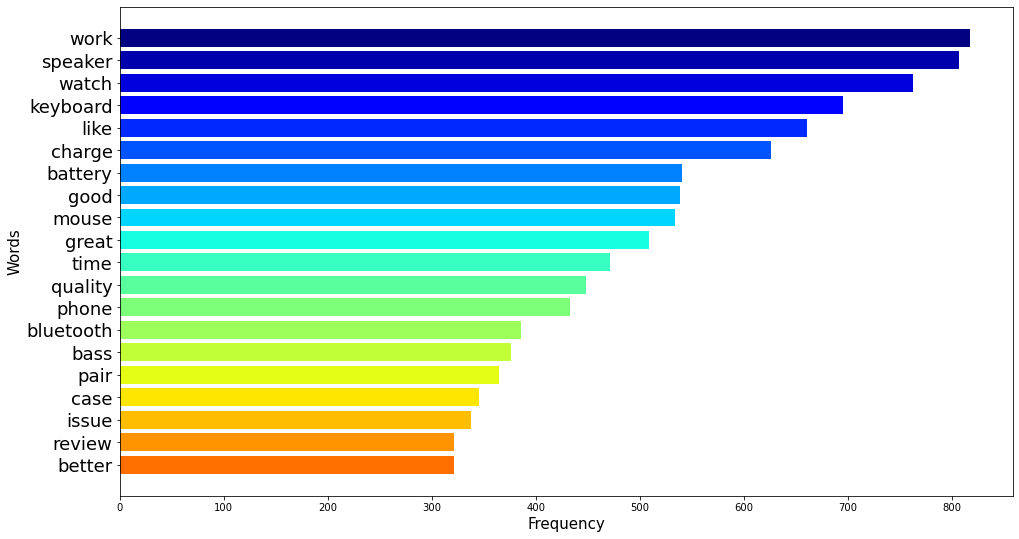

In [18]:
from collections import Counter

words = [x.split() for x in data.cleaned_text.values]
from itertools import chain
cx = Counter(list(chain(*words)))
top = 20
most_common = cx.most_common()[1:]
x, y = zip(*most_common[:top])
fig, ax = plt.subplots(1, figsize=(16,9))
ax.barh(range(len(x)), y, color = plt.cm.jet(np.linspace(0, 1, 25)))
ax.invert_yaxis()
ax.set_xlabel('Frequency', fontsize=15)
ax.set_ylabel('Words' , fontsize=15)
ax.set_yticks(np.arange(len(x)))
ax.set_yticklabels(x, fontsize=18)
plt.show()

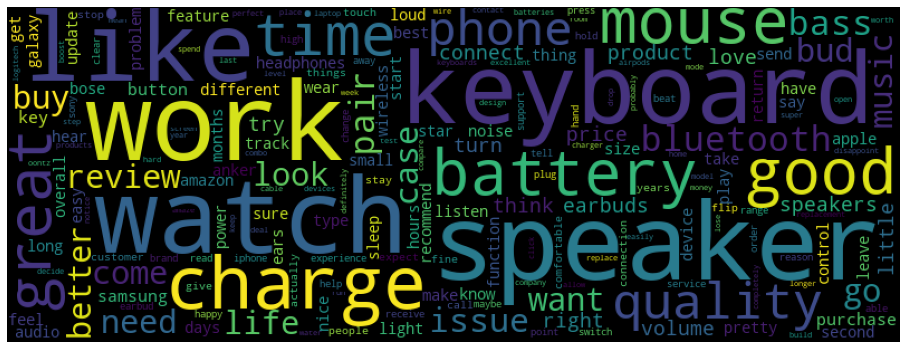

In [19]:
from wordcloud import WordCloud

d = {}
for k,v in most_common[:]:
    d[k] = int(v)

wc = WordCloud(relative_scaling=.5, width=800, height=300, background_color='black',stopwords=gensim.parsing.preprocessing.STOPWORDS).generate_from_frequencies(d)
fig = plt.figure(1,figsize=(16,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [20]:
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures, TrigramCollocationFinder, TrigramAssocMeasures

bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(list(chain(*words)), 2)


for bigram in finder.nbest(bigram_measures.likelihood_ratio, 20):
    print(bigram)

bgs2 = nltk.bigrams(list(chain(*words))) 
fdist2 = nltk.FreqDist(bgs2)
rslt2 = pd.DataFrame(Counter(fdist2).most_common(20),columns=['Word', 'Frequency']).set_index('Word')
print('=' * 60)
print(rslt2)
print('=' * 60)

('battery', 'life')
('sound', 'quality')
('customer', 'service')
('keyboard', 'mouse')
('heart', 'rate')
('highly', 'recommend')
('cap', 'lock')
('galaxy', 'bud')
('charge', 'case')
('smart', 'watch')
('soundlink', 'mini')
('bose', 'soundlink')
('read', 'review')
('anker', 'soundcore')
('mids', 'highs')
('stop', 'work')
('jelly', 'comb')
('apple', 'watch')
('water', 'resistant')
('noise', 'cancel')
                      Frequency
Word                           
(battery, life)             268
(sound, quality)            220
(keyboard, mouse)           140
(customer, service)          79
(charge, case)               76
(sound, good)                65
(bluetooth, speaker)         62
(apple, watch)               50
(galaxy, bud)                50
(great, sound)               47
(stop, work)                 46
(heart, rate)                46
(work, great)                45
(mouse, keyboard)            45
(smart, watch)               42
(sound, like)                41
(work, fine)          

In [21]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder_ = TrigramCollocationFinder.from_words(list(chain(*words)), 3)


for trigram in finder_.nbest(trigram_measures.likelihood_ratio, 20):
    print(trigram)
    
bgs3 = nltk.trigrams(list(chain(*words))) 
fdist3 = nltk.FreqDist(bgs3)
rslt3 = pd.DataFrame(Counter(fdist3).most_common(20),columns=['Word', 'Frequency']).set_index('Word')
print('=' * 60)
print(rslt3)
print('=' * 60)

('long', 'battery', 'life')
('battery', 'life', 'good')
('battery', 'life', 'great')
('battery', 'life', 'last')
('battery', 'life', 'days')
('preserve', 'battery', 'life')
('great', 'battery', 'life')
('battery', 'life', 'longer')
('battery', 'life', 'long')
('good', 'battery', 'life')
('longer', 'battery', 'life')
('hour', 'battery', 'life')
('prolong', 'battery', 'life')
('battery', 'life', 'amaze')
('battery', 'life', 'pretty')
('charge', 'battery', 'life')
('save', 'battery', 'life')
('battery', 'life', 'leap')
('battery', 'life', 'phenomenal')
('days', 'battery', 'life')
                             Frequency
Word                                  
(keyboard, mouse, combo)            26
(bose, soundlink, mini)             20
(wireless, keyboard, mouse)         18
(sound, quality, good)              18
(battery, life, good)               17
(battery, life, great)              16
(browser, support, html)            14
(support, html, video)              14
(great, battery, life)    

### Sentiment Analysis

#### V1 - TextBlob

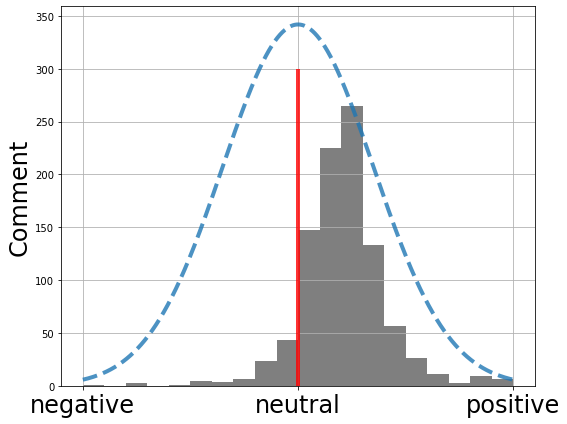

In [22]:
# Sentiment analysis - version 1 with TextBlob

import matplotlib.pyplot as plt 
from textblob import TextBlob


def TextBlob_sentimental(data):
    return TextBlob(data).sentiment.polarity



data['polarity_textblob'] = data.cleaned_text.apply(lambda x: TextBlob_sentimental(''.join(x)))
hist, edges = np.histogram(data.polarity_textblob.values, bins=np.arange(-2, 2, 0.1))

from scipy.stats import norm
fig, ax = plt.subplots(figsize=(8, 6))
data.polarity_textblob.hist(ax=ax, bins=20, color='k', alpha=0.5)
ax.set_xticks(range(-1, 2))
ax.set_xticklabels(['negative', 'neutral', 'positive'], fontsize=24)
ax.set_ylabel('Comment', fontsize=24)
x = np.arange(-1, 1, 0.001)
ax.plot(x, norm.pdf(x, 0, 0.35) * 300, '--', linewidth=4, alpha=0.8)
ax.vlines(0, 0, 300, color='r', linewidth=4, linestyle='-', alpha=0.8)
plt.tight_layout()
plt.show()

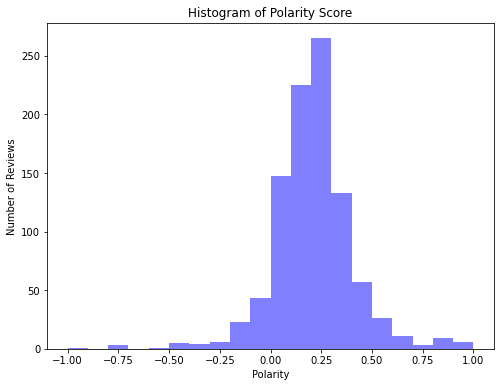

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
num_bins = 20
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(data.polarity_textblob, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();

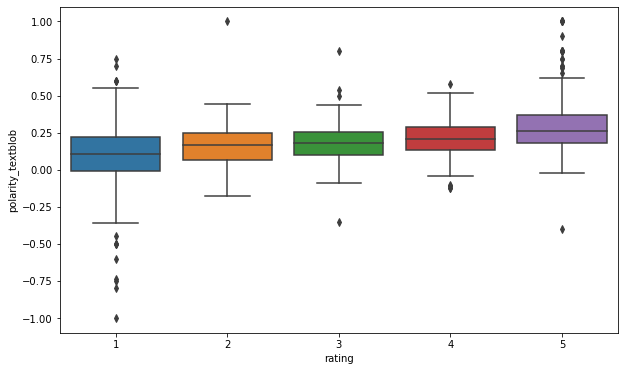

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x='rating', y='polarity_textblob', data=data)
plt.show();

In [25]:
#sample_reviews = data[['rating', 'text']]

In [26]:
#sample_reviews['polarity_textblob'] = sample_reviews.text.apply(TextBlob_sentimental)
#sample_reviews.head()

In [27]:
# Box plot of sentiment grouped by stars
#plt.figure(figsize=(10,6))
#sns.boxplot(x='rating', y='polarity_textblob', data=sample_reviews)
#plt.show();

In [28]:
#pd.set_option('max_colwidth', 400)

In [29]:
#sample_reviews[(sample_reviews.rating == 1) & (sample_reviews.polarity_textblob < 0)].head(10)

In [30]:
#sample_reviews[(sample_reviews.rating == 1) & (sample_reviews.polarity_textblob >= 0)].head(10)

In [31]:
data[(data.rating == 1) & (data.polarity_textblob >= 0)].head(10)
#the version which runs with clean data

,product_name,name,date,title,rating,text,product,cleaned_text,polarity_textblob
7,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,MyAmazon Orders,2020-06-30,Keys stick and will lag - do not purchase,1,Design - Looks and feels great.Does not work. ...,Keyboard_Mouse,design look feel great work build network syst...,0.266667
23,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,prutnik,2017-06-20,KM636 v1: good. KM636 v2: horrible.,1,I've owned a KM636 v1 for about 1.5 years. It...,Keyboard_Mouse,own years work pretty occasional brief second ...,0.219608
42,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,Jason,2020-12-18,Laggy Connection,1,"UPDATE: After I wrote the review below, I did ...",Keyboard_Mouse,update write review additional research read w...,0.148302
48,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,Sig Al,2019-02-01,Dell wireless keyboard and mouse combo.,1,This is a great wireless combo for normal ever...,Keyboard_Mouse,great wireless combo normal everyday dell come...,0.313889
1,Microsoft Wireless Comfort Desktop 5050 (PP4-0...,Nancy Crays,2018-02-22,Optical Mouse Is a Piece of Junk,1,"I had a much earlier model that I loved, so I ...",Keyboard_Mouse,earlier model love buy think good better mouse...,0.087778
5,Microsoft Wireless Comfort Desktop 5050 (PP4-0...,eagle,2018-10-08,Type 2 Keys to get anything?,1,"So, I got hooked on ""Microsoft Ergonomic"" keyb...",Keyboard_Mouse,hook microsoft ergonomic keyboards late guess ...,0.089923
6,Microsoft Wireless Comfort Desktop 5050 (PP4-0...,Joe from chicago,2017-02-27,Horrible do not buy,1,had it for a month. At first missing keystroke...,Keyboard_Mouse,month miss keystrokes completely disconnect ho...,0.028571
10,Microsoft Wireless Comfort Desktop 5050 (PP4-0...,I need a new Key Board,2020-06-19,Have to take USB out multiple times b/c the ke...,1,I always look at 1 star reviews and think to m...,Keyboard_Mouse,look star review think write mood regard star ...,0.016667
16,Microsoft Wireless Comfort Desktop 5050 (PP4-0...,Amazon Customer,2019-10-22,"Keypress is not consistent, easy to lose/miss ...",1,I picked up this keyboard as a replacement for...,Keyboard_Mouse,pick keyboard replacement comfort curve keyboa...,0.055952
20,Microsoft Wireless Comfort Desktop 5050 (PP4-0...,Dennis N Eddlemon,2018-12-08,Mouse doesn't work with Windows 10,1,I've had this keyboard and mouse (model 5000) ...,Keyboard_Mouse,keyboard mouse model years windows work fine b...,0.129167


In [32]:
def TextBlob_sentimental_score(data):
    '''
    Utility function to classify the polarity of a data
    using textblob.
    '''
    score = TextBlob(data).sentiment.polarity
    if score > 0:
        return 1
    else:
        return 0
    

In [33]:
data['textblob_score'] = data['cleaned_text'].apply(lambda x: TextBlob_sentimental_score(x))

In [34]:
pos_textblob = data.loc[data['textblob_score'] == 1]
neg_textblob = data.loc[data['textblob_score'] == 0]

In [35]:
print("Positive reviews: ", len(pos_textblob))
print("Negative reviews: ", len(neg_textblob))

Positive reviews:  840
Negative reviews:  128


In [36]:
data.textblob_score

0     0
1     1
2     1
3     1
4     1
     ..
45    1
46    1
47    1
48    1
49    1
Name: textblob_score, Length: 968, dtype: int64

#### V2 - VADER  (Valence Aware Dictionary and Sentiment Reasoner)

In [37]:
# Sentiment analysis - version 2 with VADER

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# VADER sentiment analysis tool for getting Compound score.

def vader_sentimental(sentence):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(sentence)
    score=vs['compound']
    return score


data['polarity_vader'] = data.cleaned_text.apply(lambda x: vader_sentimental(''.join(x)))

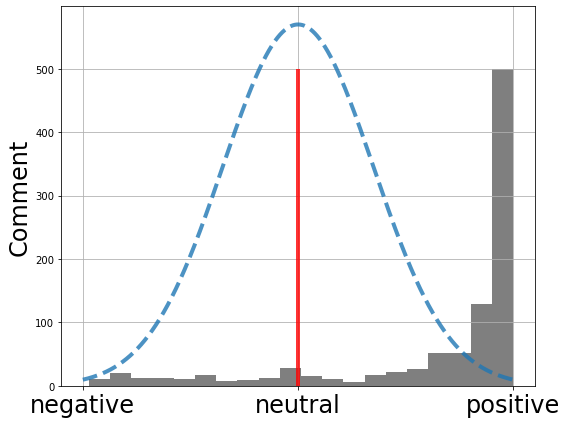

In [38]:
from scipy.stats import norm


hist, edges = np.histogram(data.polarity_vader.values, bins=np.arange(-2, 2, 0.1))


fig, ax = plt.subplots(figsize=(8, 6))
data.polarity_vader.hist(ax=ax, bins=20, color='k', alpha=0.5)
ax.set_xticks(range(-1, 2))
ax.set_xticklabels(['negative', 'neutral', 'positive'], fontsize=24)
ax.set_ylabel('Comment', fontsize=24)
x = np.arange(-1, 1, 0.001)
ax.plot(x, norm.pdf(x, 0, 0.35) * 500, '--', linewidth=4, alpha=0.8)
ax.vlines(0, 0, 500, color='r', linewidth=4, linestyle='-', alpha=0.8)
plt.tight_layout()
plt.show()

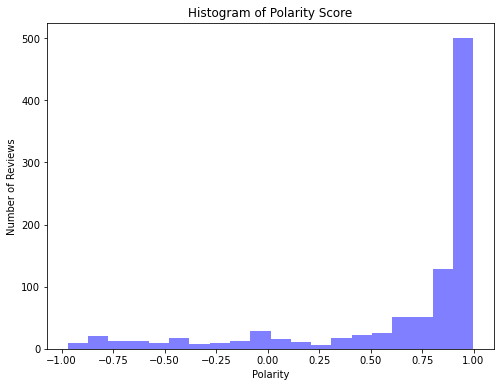

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
num_bins = 20
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(data.polarity_vader, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();

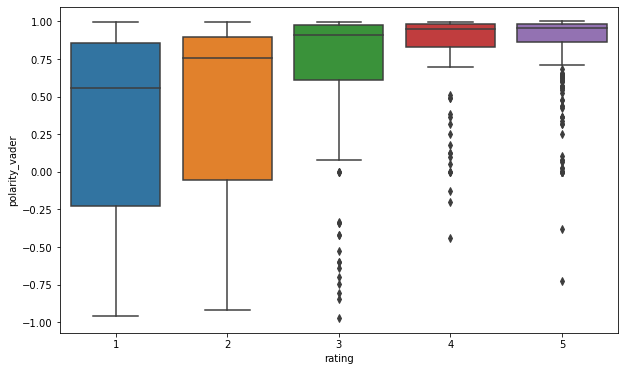

In [40]:
plt.figure(figsize=(10,6))
sns.boxplot(x='rating', y='polarity_vader', data=data)
plt.show();

In [41]:
# VADER sentiment analysis tool for getting pos, neg and neutral reviews
def vader_sentimental_score(sentence):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(sentence)
    score=vs['compound']
    if score >= 0:
        return 1
    else:
        return 0

In [42]:
data['vader_score'] = data['cleaned_text'].apply(lambda x: vader_sentimental_score(x))

In [43]:
pos_vader = data.loc[data['vader_score'] == 1]
neg_vader = data.loc[data['vader_score'] == 0]

In [44]:
print("Positive reviews: ", len(pos_vader))
print("Negative reviews: ", len(neg_vader))

Positive reviews:  850
Negative reviews:  118


In [45]:
data.head()

,product_name,name,date,title,rating,text,product,cleaned_text,polarity_textblob,textblob_score,polarity_vader,vader_score
0,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,Andy. The Captain,2018-05-20,Simply don't buy it... There is no excuse for ...,1,This keyboard shouldn't be sold. I don't know ...,Keyboard_Mouse,keyboard shouldn sell know dell manage post am...,-0.079356,0,-0.9360,0
1,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,Dan Neuwirth,2018-05-11,"Feels good, but has its flaws.",2,"I'm really torn over this. On the one hand, i...",Keyboard_Mouse,tear hand feel nicely design key feel great co...,0.289966,1,0.9905,1
2,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,Manvendra Singh,2017-12-26,Simply amazing and great value for money.,5,I work in IT industry for over ten years so I...,Keyboard_Mouse,work industry years keyboards mouse expensive ...,0.324583,1,0.9445,1
3,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,IJK,2019-03-31,Skips letters..read update,5,Update:I actually went to the dell website and...,Keyboard_Mouse,update actually go dell website download drive...,0.186667,1,0.5267,1
4,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,SGoldfarb,2018-08-15,Decent keyboard - major drawbacks though.,2,So I got a new job where I would be working wi...,Keyboard_Mouse,work multiple devices contract issue dell site...,0.082258,1,0.8417,1


### Logistic Regression

In [51]:
# Sentiment analysis - version 3 with Logistic regression
# for more detail on algorithm, please see file classification_ipynb under ./script_classification_lr

import joblib
# load the model from disk - classification_lr - classification_ipynb file
loaded_model = joblib.load("./script/classification_lr/logisticregression_model.sav")
result = loaded_model.predict(data.cleaned_text)
#print(result)

In [52]:
len(result[result=="0"])

438

In [53]:
len(result[result=="1"])

530

In [54]:
data["lr_result"] = result.astype(int)

### Comparing all approaches for all products

In [55]:
# optional - cok anlamli degil
# data.groupby(['product','product_name']).agg({'polarity_textblob':['mean','median','std'],'polarity_vader':['mean','median','std'], 'lr_result':['mean'] })

In [56]:
data.groupby(['product','product_name'])['textblob_score',"vader_score","lr_result"].agg([('negative' , lambda x : x[x == 0].count()) , ('positive' , lambda x : x[x == 1].count())])

textblob_score  \
                                                                          negative   
product          product_name                                                        
Keyboard_Mouse   Dell KM636 Wireless Keyboard & Mouse Combo (5WH...              7   
                 HP Wireless Keyboard and Mouse 300                              2   
                 Logitech MK335 Wireless Keyboard and Mouse Comb...             14   
                 Microsoft Wireless Comfort Desktop 5050 (PP4-00...             10   
                 Wireless Keyboard and Mouse Combo, Jelly Comb 2...              2   
Smarth_Watch     Apple Watch Series 5 (GPS, 44MM) - Space Gray A...             15   
                 Apple Watch Series 6 (GPS + Cellular, 44mm) - S...              5   
                 HUAWEI Watch GT 2e Bluetooth SmartWatch, Sport ...             18   
                 SAMSUNG Galaxy Watch 3 (45mm, GPS, Bluetooth) S...              9   
                 SAMSUNG Galaxy Watch Active 2 (40mm, GPS, Bluet...              9   
                 Smart Watch, Virmee VT3 Fitness Tracker with He...              4   
Speaker          JBL FLIP 4 - Waterproof Portable Bluetooth Spea...              7   
                 OontZ Angle 3 Bluetooth Portable Speaker, Loude...              4   
                 Sony SRS-XB33 EXTRA BASS Wireless Portable Spea...              1   
                 The Bose SoundLink Revolve, the Portable Blueto...              7   
                 Upgraded, Anker Soundcore Boost Bluetooth Speak...              0   
Wireless_Earbuds Anker Soundcore Spirit X2, True Wireless Earbud...              1   
                 Powerbeats Pro Wireless Earbuds - Apple H1 Head...              3   
                 Samsung Galaxy Buds+ Plus, True Wireless Earbud...              6   
                 Skullcandy Sesh Evo True Wireless In-Ear Earbud...              4   
                 TOZO T6 True Wireless Earbuds Bluetooth Headpho...              0   

                                                                              \
                                                                    positive   
product          product_name                                                  
Keyboard_Mouse   Dell KM636 Wireless Keyboard & Mouse Combo (5WH...       43   
                 HP Wireless Keyboard and Mouse 300                        3   
                 Logitech MK335 Wireless Keyboard and Mouse Comb...       36   
                 Microsoft Wireless Comfort Desktop 5050 (PP4-00...       40   
                 Wireless Keyboard and Mouse Combo, Jelly Comb 2...       48   
Smarth_Watch     Apple Watch Series 5 (GPS, 44MM) - Space Gray A...       35   
                 Apple Watch Series 6 (GPS + Cellular, 44mm) - S...        8   
                 HUAWEI Watch GT 2e Bluetooth SmartWatch, Sport ...       32   
                 SAMSUNG Galaxy Watch 3 (45mm, GPS, Bluetooth) S...       41   
                 SAMSUNG Galaxy Watch Active 2 (40mm, GPS, Bluet...       41   
                 Smart Watch, Virmee VT3 Fitness Tracker with He...       46   
Speaker          JBL FLIP 4 - Waterproof Portable Bluetooth Spea...       43   
                 OontZ Angle 3 Bluetooth Portable Speaker, Loude...       46   
                 Sony SRS-XB33 EXTRA BASS Wireless Portable Spea...       49   
                 The Bose SoundLink Revolve, the Portable Blueto...       43   
                 Upgraded, Anker Soundcore Boost Bluetooth Speak...       50   
Wireless_Earbuds Anker Soundcore Spirit X2, True Wireless Earbud...       49   
                 Powerbeats Pro Wireless Earbuds - Apple H1 Head...       47   
                 Samsung Galaxy Buds+ Plus, True Wireless Earbud...       44   
                 Skullcandy Sesh Evo True Wireless In-Ear Earbud...       46   
                 TOZO T6 True Wireless Earbuds Bluetooth Headpho...       50   

                                                                    vader_score  \

# ___end of Sentiment_Analysis_All_Products___

#### ___Esra Erkan_June 10, 2021___